# Exercise to determine the computational scaling of bubble sort

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Bubble sort function

In [2]:
import time

def bubble_sort(arr):
    
    start_time = time.time()

    n = len(arr)
    
    for i in range(0,n-1):
        for j in range(i+1,n):
            if arr[j] < arr[i]:
                arr[j], arr[i] = arr[i], arr[j]
    
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    
    return arr, elapsed_time

## Define the sizes of the array to sort

In [3]:
powers=np.arange(0,13)
print(powers)

sizes=2**powers
print(sizes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[   1    2    4    8   16   32   64  128  256  512 1024 2048 4096]


## Prepare of arrays of sizes (N) and CPU time (t)

In [4]:
N=[]
t=[]
for size in sizes:
    arr = np.random.uniform(-100.0, 100.0,size=size)
    sorted_arr,elapsed_time = bubble_sort(arr)
    N.append(size)
    t.append(elapsed_time)
    print(size,elapsed_time)

N=np.array(N)
t=np.array(t)

1 1.9073486328125e-06
2 5.0067901611328125e-06
4 6.9141387939453125e-06
8 1.9788742065429688e-05
16 6.604194641113281e-05
32 0.0002880096435546875
64 0.0010671615600585938
128 0.0042629241943359375
256 0.015902996063232422
512 0.06865501403808594
1024 0.2658860683441162
2048 1.0674259662628174
4096 4.296817779541016


##  Fit to a polynomial of degree = 1 (straight line) using `numpy`

Let us fit $t$ to a polynomial $t=c_1N+c_0$

In [5]:
degree = 1  # degree of the polynomial

coefficients = np.polyfit(N, t, degree)
print(coefficients)

[ 0.00095845 -0.16386719]


In [6]:
# Print the polynomial
p = np.poly1d(coefficients)

print(p)

 
0.0009585 x - 0.1639


In [7]:
polynomial = np.poly1d(coefficients) # prepares polynomial function to apply

Apply the polynomial to find the fitted values of time.

In [8]:
fitted_t = polynomial(N)
print(fitted_t) # compare these to the actual CPU time

[-0.16290874 -0.16195029 -0.16003338 -0.15619957 -0.14853196 -0.13319673
 -0.10252627 -0.04118535  0.08149648  0.32686015  0.8175875   1.79904218
  3.76195155]


Plot the data

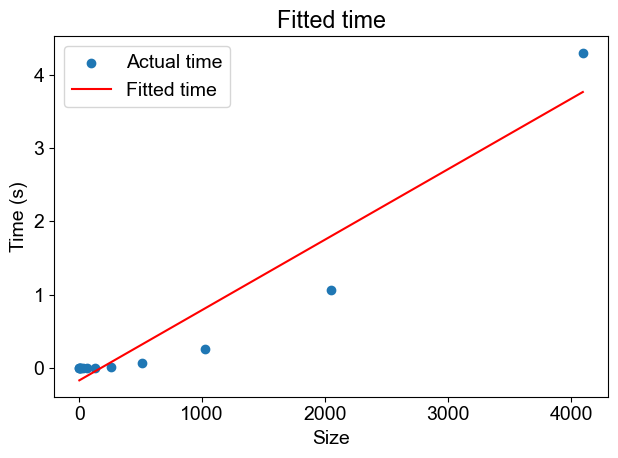

In [9]:
plt.rcParams.update({'font.size': 14, 'font.family': 'Arial'}) 

plt.scatter(N, t, label='Actual time')
plt.plot(N, fitted_t, label=f'Fitted time', color='red')

plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Fitted time')
plt.tight_layout()
plt.savefig("bubblesort_scaling_linear.png")
plt.show()

##  Fit to a polynomial of degree = 2 (quadratic function) using `numpy`

Let us fit $t$ to a polynomial $t=c_2N^2+c_1N+c_0$

In [10]:
degree = 2  # degree of the polynomial

coefficients = np.polyfit(N, t, degree)

p = np.poly1d(coefficients)

print(p)

           2
2.573e-07 x - 4.953e-06 x + 0.0004593


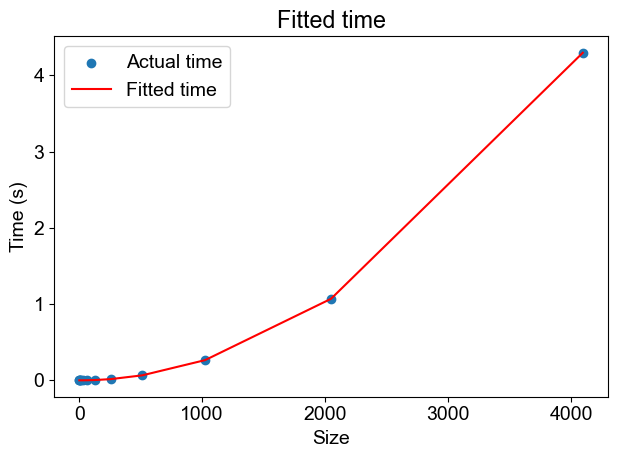

In [11]:
polynomial = np.poly1d(coefficients) 
fitted_t = polynomial(N)

plt.rcParams.update({'font.size': 14, 'font.family': 'Arial'}) 

plt.scatter(N, t, label='Actual time')
plt.plot(N, fitted_t, label=f'Fitted time', color='red')

plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Fitted time')
plt.tight_layout()
plt.savefig("bubblesort_scaling_quadratic.png")
plt.show()

The quadratic function explains the data, so the scaling quadratic. In otherwords, the CPU time of bubble sort scales as $\mathcal{O}(N^2)$.